In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import random

In [48]:
def show_curve(z, critical):
    x = np.linspace(-4, 4, 1000)
    y = stats.norm.pdf(x)  
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Z-distribution', color='blue')
    
    if tail == 1: # Left-tailed
        plt.fill_between(x, y, where=(x < critical), color='red', alpha=0.5, label='Critical Region')
    elif tail == 2: # Two-tailed
        critical_left = stats.norm.ppf(alpha / 2)
        critical_right = stats.norm.ppf(1 - alpha / 2)
        plt.fill_between(x, y, where=(x < critical_left), color='red', alpha=0.5, label='Critical Region (Left)')
        plt.fill_between(x, y, where=(x > critical_right), color='red', alpha=0.5, label='Critical Region (Right)')
    else: # Right-tailed
        plt.fill_between(x, y, where=(x > critical), color='red', alpha=0.5, label='Critical Region')

    plt.axvline(z, color='orange', linestyle='--', label='Z-Statistic') # Z-Statistic
    
    plt.title('Z-Test: Critical Region and Z-Statistic')
    plt.xlabel('Z Value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid()
    plt.show()

In [49]:
def z_test(sample, population_mean, alpha, tail):
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    n = len(sample)
    # Calculate Z-statistic
    z = (sample_mean - population_mean) / (sample_std / np.sqrt(n))
    if tail == 1: # Left-tailed
        critical = stats.norm.ppf(alpha)
    elif tail == 2: # Two-tailed
        critical = stats.norm.ppf(1 - alpha / 2)
    else: # Right-tailed
        critical = stats.norm.ppf(1 - alpha)
    show_curve(z, critical)
    print(f"Z-Statistic: {z:.4f}, Sample Mean: {sample_mean:.4f}")
    print(f"Critical Value: {critical:.4f}")
    if tail == 1 and z < critical:
        print(f"{z:.4f} < {critical:.4f} Reject the null hypothesis (left-tailed).")
    elif tail == 2 and (z < -critical or z > critical):
        expr = (f"{z:.4f} < {-critical:.4f}") if z < -critical else (f"{z:.4f} > {critical:.4f}")
        print(f"{expr} Reject the null hypothesis (two-tailed).")
    elif tail == 3 and z > critical:
        print(f"{z:.4f} > {critical:.4f} Reject the null hypothesis (right-tailed).")
    else:
        print(f"Fail to reject the null hypothesis.")

In [46]:
def EDA(df, column, eda_type):
    if eda_type == 1:
        df[column] = pd.to_numeric(df[column], errors='coerce')
        #converting to float
        df[column] = df[column].astype(float) # specify int if need integer values
        print("No of Nulls:",df[column].isnull().sum())
        #filling null values with mean imputation can also use .median() for median imputation etc
        df[column] = df[column].fillna(df[column].mean())
        return df[column].to_list()
    elif eda_type == 2:
        df[column] = df[column].dropna()
        return df[column].to_list()

No of Nulls: 0


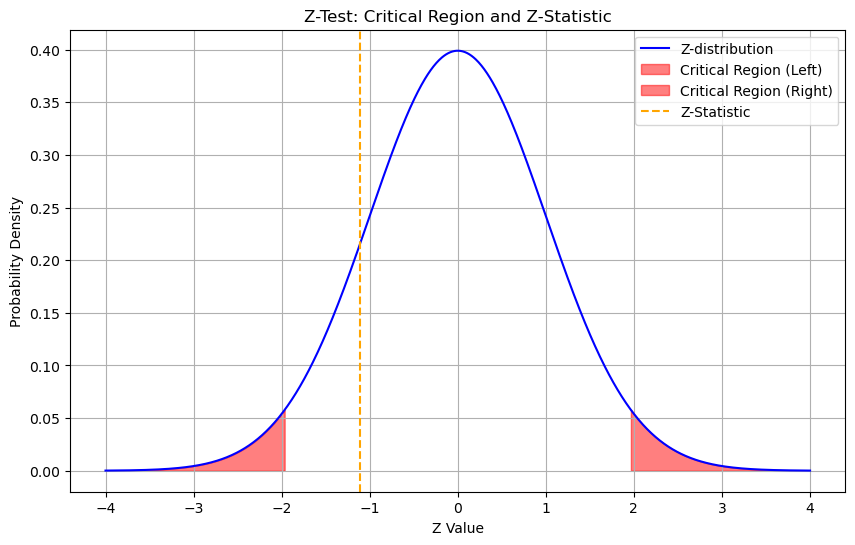

Z-Statistic: -1.1079, Sample Mean: 163.0400
Critical Value: 1.9600
Fail to reject the null hypothesis.


In [50]:
file_path = "height_weight_bmi.csv"
column = "Standing Height (cm)"
N = 1000
df = pd.read_csv(file_path) #dataset
df = pd.DataFrame(df).iloc[:N] #1000 records are fetched not all

#if 1 for mean imputation(do this if column contains invalid values(strings)
#if 2 drops null values(do this if column is numeric)
population = EDA(df, column, eda_type = 1) #height column
population_mean = np.mean(population)
sample_size = 10
sample = random.choices(population, k = sample_size)#random sampling
alpha = 0.05
tail = 2 # Change to 1 for left-tailed, 2 for two-tailed, 3 for right-tailed
z_test(sample, population_mean, alpha, tail)